# A/B Testing

*Game Data*

The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

1. userid - a unique number that identifies each player.
2. version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
3. sum_gamerounds - the number of game rounds played by the player during the first week after installation
4. retention_1 - did the player come back and play 1 day after installing?
5. retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.


In [113]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [114]:
df = pd.read_csv('C:\\Users\\sunta\\OneDrive\\Desktop\\data\\abtesting\\cookie_cats.csv')

In [115]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [116]:
df.shape

(90189, 5)

In [117]:
df.groupby("version").sum_gamerounds.agg(["count","mean","median"])

,count,mean,median
version,,,
gate_30,44700,52.456264,17.0
gate_40,45489,51.298776,16.0


In [118]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

count (90189): There are 90,189 non-null entries in the sum_gamerounds column.

mean (51.87): On average, users played approximately 52 game rounds.

std (195.05): The standard deviation is quite high, indicating a wide spread or variability in the number of game rounds played.

min (0): The minimum number of game rounds played is 0. Some users didn’t play at all.

25% (5): 25% of the users played 5 or fewer rounds (1st quartile).

50% (16): 50% (the median) played 16 or fewer rounds.

75% (51): 75% of the users played 51 or fewer rounds.

max (49854): One user played a whopping 49,854 rounds, which is an extreme outlier.

Interpretation
Most users played a relatively small number of rounds (e.g., 75% played ≤51), but a few played a very large number, which skews the mean upward and increases the standard deviation. This suggests the distribution is right-skewed, possibly with outliers.

*Use IQR to get rid of outliers*

In [119]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


In [120]:
df = df[df.sum_gamerounds<df.sum_gamerounds.max()]

In [121]:
df.shape

(90188, 5)

In [122]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


<Axes: xlabel='sum_gamerounds'>

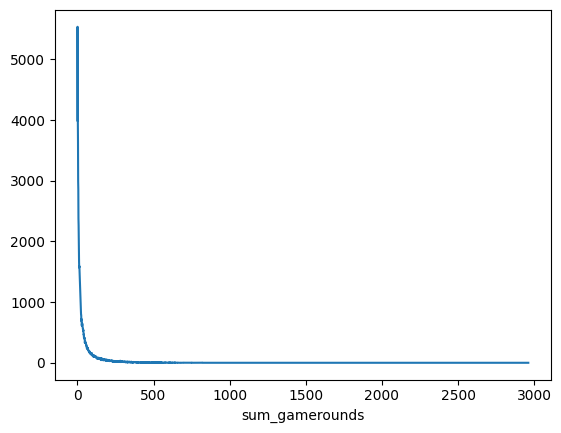

In [124]:
df.groupby("sum_gamerounds").userid.count().plot()

<Axes: xlabel='sum_gamerounds'>

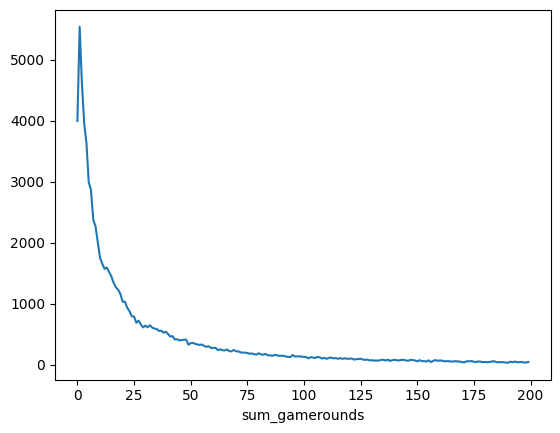

In [129]:
df.groupby("sum_gamerounds").userid.count()[:200].plot()